# Setup

First things first, import the libraries you'll use to load, process and analyze your data.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

import matplotlib.ticker as ticker

Let's import the data we're working with.

In [5]:
raw_data = pd.read_csv("../src/raw_data.csv")

# Exploriation

Now, let's take a look at the raw data using some of the available tools in your pandas libraries.

In [6]:

raw_data.shape
raw_data.describe
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73513 entries, 0 to 73512
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       73513 non-null  int64  
 1   Street                   59445 non-null  object 
 2   HouseNumber              57351 non-null  object 
 3   Box                      13636 non-null  object 
 4   Floor                    28628 non-null  float64
 5   City                     73513 non-null  object 
 6   PostalCode               73513 non-null  int64  
 7   Region                   73513 non-null  object 
 8   District                 73513 non-null  object 
 9   Province                 73513 non-null  object 
 10  PropertyType             73513 non-null  object 
 11  PropertySubType          73513 non-null  object 
 12  Price                    73511 non-null  float64
 13  SaleType                 73513 non-null  object 
 14  BidStylePricing       

The raw data has 39 columns and 73513 entries in total.

Let's look at the missings

In [7]:
for column in raw_data.columns:
    missingprop = raw_data[column].isna().sum() / raw_data.shape[0] *100
    if missingprop > 0 :
        print(f'{column}: {round(missingprop, 2)}%')

Street: 19.14%
HouseNumber: 21.99%
Box: 81.45%
Floor: 61.06%
Price: 0.0%
BidStylePricing: 13.53%
ConstructionYear: 39.5%
LivingArea: 12.22%
KitchenType: 42.38%
Furnished: 67.39%
Terrace: 47.15%
TerraceArea: 66.59%
Garden: 76.98%
GardenArea: 38.98%
Facades: 29.21%
SwimmingPool: 67.34%
Condition: 28.96%
EPCScore: 21.43%
EnergyConsumptionPerSqm: 24.8%
Latitude: 19.2%
Longitude: 19.2%
ListingCloseDate: 99.64%
bookmarkCount: 1.49%
ViewCount: 1.49%
PropertyUrl: 100.0%


There seem to be a bit of missings, as well as columns that might be less usefull. Additionally, some variables have unexpected inputs.

In [8]:
raw_data['ConstructionYear'].max()

9999.0

# Cleaning the data

Cleaning the data addresses some of the noise by removing duplicates, removing empty rows by Price and LivingArea, fixing formatting, setting types, and added a few calculated columns.

These tasks are confined in the clean_data function in utils/clean.py

Some entries were dropped in the process:
1. Empty values in 'Price' and 'LivingArea', since these seem very valuable variables: 8.985 entries removed (12.19% of raw dataset)
2. Rows were the saletype is 'residential sale' or 'bidstyle pricing': 5071 entries removed (6.9% of raw dataset)
3. No duplicates were found

### Feature-engineering

the clean_data function also handles the creation of a few new columns:
1. TotalArea: combination of LivingArea, GardenArea and TerraceArea
2. PricePerLivingSquaremMeter: Price divided by LivingArea
3. PricePerTotalSquareMeter: Price divided by TotalArea

### Adding external data: population density

Additional data was imported: governmental data on the population size for each area. Onfortunately the data uses a different code than postal code (refnis code), so a translation table has to be introduced. Additional calculations were made before introducing the new data to the now cleaned data: 
1. Area size changed from hm² to km²
2. Calculation of population per km²

The required steps are found in the adding_data.py file in the utils folder.

Result: cleaned_data.csv. 

Let's import it here to continue our analysis.

In [15]:
clean_data = pd.read_csv("../src/cleaned_data.csv")

# Analysing cleaned data

How does this cleaning effort change the dataset?

In [16]:
cleaned_data = pd.read_csv("../src/cleaned_data.csv")
cleaned_data.shape
cleaned_data.describe()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59457 entries, 0 to 59456
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         59457 non-null  int64  
 1   City                       59457 non-null  object 
 2   PostalCode                 59457 non-null  int64  
 3   Region                     59457 non-null  object 
 4   District                   59457 non-null  object 
 5   Province                   59457 non-null  object 
 6   PropertyType               59457 non-null  object 
 7   PropertySubType            59457 non-null  object 
 8   Price                      59457 non-null  float64
 9   ConstructionYear           38208 non-null  float64
 10  BedroomCount               59457 non-null  int64  
 11  LivingArea                 59457 non-null  float64
 12  KitchenType                35729 non-null  object 
 13  Furnished                  59457 non-null  int

The raw_data originally contained 73,513 rows, which was then trimmed down to 59,457 in the clean_data. Also notice the Dtype on the columns, several have been changed from object to int or float for later analysis.

Now that we've cleaned the data of some of the noise, let's check to see if it's distributed normally by Price. We're checking price because it's our keystone value in the dataset.

C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\3966182852.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=cleaned_data['Price'], kde=True, color='orange', palette=['orange'])


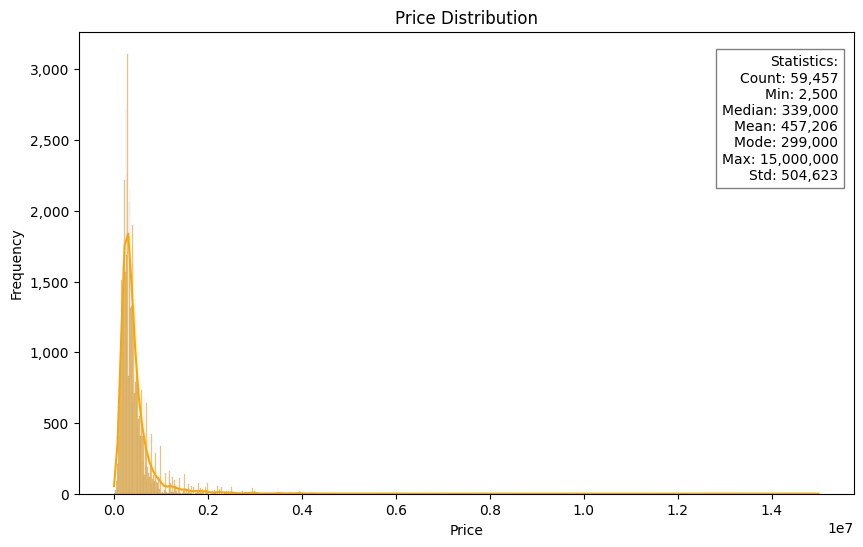

In [18]:
# Calculate statistics for 'Price' column
price_min = cleaned_data['Price'].min()
price_median = cleaned_data['Price'].median()
price_mean = cleaned_data['Price'].mean()
price_mode = cleaned_data['Price'].mode()[0]
price_max = cleaned_data['Price'].max()
price_count = cleaned_data['Price'].count()
price_std = cleaned_data['Price'].std()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data['Price'], kde=True, color='orange', palette=['orange'])

# Add text box for 'Price' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_count)}\nMin: {format_number(price_min)}\nMedian: {format_number(price_median)}\nMean: {format_number(price_mean)}\nMode: {format_number(price_mode)}\nMax: {format_number(price_max)}\nStd: {format_number(price_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()

It's heavily right shifted. That moves the mean up, which you can see as the Mean value is nearly 120k higher than the Median value. When it comes to predictions, a normal dataset it best, but we also don't want to eliminate data if we don't have to. Can you think of a way to normalize the Price data without eliminating outliers?

C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\256899660.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=cleaned_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


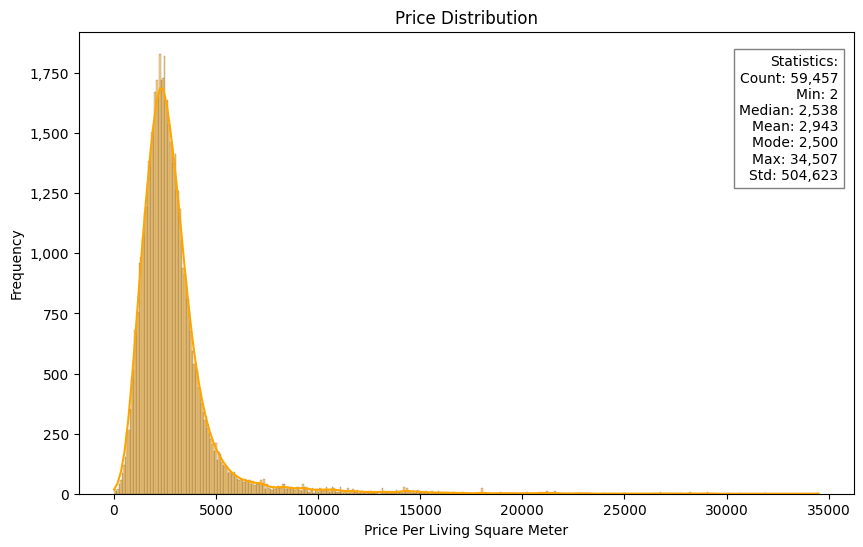

In [29]:
# Calculate statistics for 'Price' column
price_min = cleaned_data['PricePerLivingSquareMeter'].min()
price_median = cleaned_data['PricePerLivingSquareMeter'].median()
price_mean = cleaned_data['PricePerLivingSquareMeter'].mean()
price_mode = cleaned_data['PricePerLivingSquareMeter'].mode()[0]
price_max = cleaned_data['PricePerLivingSquareMeter'].max()
price_count = cleaned_data['PricePerLivingSquareMeter'].count()
price_std = cleaned_data['Price'].std()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text box for 'Price' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_count)}\nMin: {format_number(price_min)}\nMedian: {format_number(price_median)}\nMean: {format_number(price_mean)}\nMode: {format_number(price_mode)}\nMax: {format_number(price_max)}\nStd: {format_number(price_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()

Using ratios is a great way to normalize data without removing outliers. However, it's still right-shifted by looking at the long right tail and the mean's position against the median. Check out these data points and see if you notice anything unique about them; maybe they're all associated to specific property types, locations or appear to be keying errors. 

In [30]:
cleaned_data.sort_values(by='PricePerLivingSquareMeter', ascending=False).head(20)

ID                 City  PostalCode    Region District  \
52580  10188469         Knokke-Heist        8300  Flanders   Brugge   
52550  10188467         Knokke-Heist        8300  Flanders   Brugge   
28145  10957657         Knokke-Heist        8300  Flanders   Brugge   
52627  10979908         Knokke-Heist        8300  Flanders   Brugge   
52781  10813068         Knokke-Heist        8300  Flanders   Brugge   
51995  10917470         Knokke-Heist        8300  Flanders   Brugge   
49328  11140610  Knokke-Heist Knokke        8300  Flanders   Brugge   
53005  11038255         Knokke-Zoute        8300  Flanders   Brugge   
53909  11141758         Knokke-Heist        8300  Flanders   Brugge   
53702  10855705         Knokke-Heist        8300  Flanders   Brugge   
50171  10863279               Knokke        8300  Flanders   Brugge   
53434  10717977         Knokke-Heist        8300  Flanders   Brugge   
52965  10857746         Knokke-Heist        8300  Flanders   Brugge   
24273  10950535            Het Zoute        8300  Flanders   Brugge   
53001  11035217         Knokke-Heist        8300  Flanders   Brugge   
51821  10654777         Knokke-Heist        8300  Flanders   Brugge   
50098   9502819  Knokke-Heist Knokke        8300  Flanders   Brugge   
52017  10228933         Knokke-Heist        8300  Flanders   Brugge   
52669   9405211         Knokke-Heist        8300  Flanders   Brugge   
52098   9435313            Het Zoute        8300  Flanders   Brugge   

            Province PropertyType PropertySubType      Price  \
52580  West Flanders    Apartment       Apartment  4900000.0   
52550  West Flanders    Apartment       Apartment  4750000.0   
28145  West Flanders        House           House  3890000.0   
52627  West Flanders    Apartment       Apartment  3495000.0   
52781  West Flanders    Apartment       Apartment  3495000.0   
51995  West Flanders    Apartment       Apartment  2295000.0   
49328  West Flanders    Apartment       Apartment  2295000.0   
53005  West Flanders    Apartment       Apartment  2295000.0   
53909  West Flanders    Apartment       Apartment  2295000.0   
53702  West Flanders    Apartment       Apartment  2295000.0   
50171  West Flanders    Apartment       Apartment  2295000.0   
53434  West Flanders    Apartment       Apartment  2295000.0   
52965  West Flanders    Apartment       Apartment  2295000.0   
24273  West Flanders        House           Villa  3890000.0   
53001  West Flanders    Apartment       Apartment  4600000.0   
51821  West Flanders    Apartment       Apartment  4600000.0   
50098  West Flanders    Apartment       Apartment  4600000.0   
52017  West Flanders    Apartment       Apartment  4600000.0   
52669  West Flanders    Apartment       Apartment  4600000.0   
52098  West Flanders    Apartment       Apartment  4600000.0   

       ConstructionYear  ...  ListingExpirationDate  ListingCloseDate  \
52580            2021.0  ...             2024-02-29               NaN   
52550            2021.0  ...             2024-02-29               NaN   
28145            1936.0  ...             2024-02-29               NaN   
52627            2020.0  ...             2024-02-29               NaN   
52781            2020.0  ...             2024-02-29               NaN   
51995            1968.0  ...             2024-02-29               NaN   
49328            1969.0  ...             2024-06-14               NaN   
53005            1969.0  ...             2024-02-29               NaN   
53909            1969.0  ...             2024-06-14               NaN   
53702            1967.0  ...             2024-02-29               NaN   
50171            1969.0  ...             2024-02-29               NaN   
53434            1969.0  ...             2024-02-29               NaN   
52965            1968.0  ...             2024-02-29               NaN   
24273            1936.0  ...             2024-02-29               NaN   
53001            2011.0  ...             2024-02-29               NaN   
51821   

Let's take a look at all these outliers and see what we have to take into account.

In [22]:
for column in clean_data.columns:
    if column in ['Price', 'ConstructionYear','BedroomCount', 'LivingArea', 'TerraceArea', 
                  'GardenArea', 'Facades', 'EnergyConsumptionPerSqm', 'PricePerLivingSquareMeter',
                  'PricePerTotalSquareMeter', 'PopulationDensity']:
        print(f'--{column}--')
        # setting IQR
        clean_data[column].dropna()
        Q1 = clean_data[column].quantile(0.25)
        Q3 = clean_data[column].quantile(0.75)
        IQR = Q3 - Q1
        # identify outliers
        threshold = 1.5
        outliers = clean_data[(clean_data[column] < Q1 - threshold * IQR) | (clean_data[column] > Q3 + threshold * IQR)]
        lower = clean_data[(clean_data[column] < Q1 - threshold * IQR)]
        upper = clean_data[(clean_data[column] > Q3 + threshold * IQR)]
        print(len(outliers), f'outliers \nbelow Q1 - 1.5*IQR: {len(lower)}\nabove Q3 + 1.5*IQR: {len(upper)}')
        ## Optional: check specific variable outliers
        # if column == 'ConstructionYear':
        #     print(lower[column])
        #     print(upper[column])

--Price--
4589 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 4589
--ConstructionYear--
674 outliers 
below Q1 - 1.5*IQR: 674
above Q3 + 1.5*IQR: 0
--BedroomCount--
821 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 821
--LivingArea--
3726 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 3726
--TerraceArea--
6127 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 6127
--GardenArea--
5683 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 5683
--Facades--
17 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 17
--EnergyConsumptionPerSqm--
1855 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 1855
--PricePerLivingSquareMeter--
3236 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 3236
--PricePerTotalSquareMeter--
1855 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 1855
--PopulationDensity--
5930 outliers 
below Q1 - 1.5*IQR: 0
above Q3 + 1.5*IQR: 5930


It seems like some variable distributions are skewed, mainly towards the right.

# Handling outliers

In [25]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

model_data = clean_data.copy()

for col in ['Price', 'ConstructionYear','BedroomCount', 'LivingArea', 'TerraceArea', 
                  'GardenArea', 'Facades', 'EnergyConsumptionPerSqm', 'PricePerLivingSquareMeter',
                  'PricePerTotalSquareMeter', 'PopulationDensity']:
    model_data = remove_outliers(model_data, col)

model_data.describe()


ID    PostalCode          Price  ConstructionYear  \
count  1.101900e+04  11019.000000   11019.000000      11019.000000   
mean   1.101959e+07   4689.250204  322035.287140       1973.364643   
std    2.477007e+05   3043.934716  132113.274786         34.030968   
min    1.882546e+06   1000.000000   40000.000000       1873.000000   
25%    1.098099e+07   2145.000000  226750.000000       1954.000000   
50%    1.108905e+07   3290.000000  297000.000000       1973.000000   
75%    1.114531e+07   8400.000000  390000.000000       2003.000000   
max    1.118053e+07   9991.000000  865000.000000       2026.000000   

       BedroomCount    LivingArea     Furnished     Fireplace       Terrace  \
count  11019.000000  11019.000000  11019.000000  11019.000000  11019.000000   
mean       2.604229    135.529812      0.023323      0.207278      0.626645   
std        0.872163     53.723880      0.150935      0.405375      0.483717   
min        1.000000     18.000000      0.000000      0.000000      0.000000   
25%        2.000000     93.000000      0.000000      0.000000      0.000000   
50%        3.000000    128.000000      0.000000      0.000000      1.000000   
75%        3.000000    170.000000      0.000000      0.000000      1.000000   
max        4.000000    302.000000      1.000000      1.000000      1.000000   

        TerraceArea  ...     Latitude    Longitude  bookmarkCount  \
count  11019.000000  ...  9768.000000  9768.000000   11019.000000   
mean       4.967874  ...    50.974709     4.352440      24.616844   
std        8.069182  ...     0.275784     0.729698      34.247437   
min        0.000000  ...    49.556637     2.569130       0.000000   
25%        0.000000  ...    50.830223     4.005874       5.000000   
50%        0.000000  ...    51.026768     4.404528      13.000000   
75%        9.000000  ...    51.185836     4.776769      31.000000   
max       30.000000  ...    51.475585     6.213532     655.000000   

          ViewCount     TotalArea  PricePerLivingSquareMeter  \
count  11019.000000  11019.000000               11019.000000   
mean    2004.520374    325.159452                2531.379163   
std     2539.536073    274.031984                 878.749689   
min        0.000000     18.000000                 365.000000   
25%      596.000000    101.000000                1893.000000   
50%     1272.000000    210.000000                2429.000000   
75%     2551.500000    492.000000                3065.000000   
max    79639.000000   1158.000000                5200.000000   

       PricePerTotalSquareMeter   Condition#  KitchenType#  PopulationDensity  
count              11019.000000  8808.000000   7796.000000       11019.000000  
mean                1741.268082     3.204019      0.958568        1305.470460  
std                 1173.816852     1.234067      0.199299        1267.602337  
min                   51.000000     0.000000      0.000000          25.000000  
25%                  673.000000     3.000000      1.000000         430.000000  
50%                 1507.000000     3.000000      1.000000         827.000000  
75%                 2642.000000     4.000000      1.000000        1762.000000  
max                 5200.000000     5.000000      1.000000        5872.000000  

[8 rows x 25 columns]

# Analysing model data

## Looking at size: Price per square meter

Use the model_data dataframe to check distribution without outliers by pricepersquaremeter. Let's explore it's shape first.

In [31]:
model_data = pd.read_csv("../src/model_data.csv")
model_house_data = model_data[model_data['PropertyType'] == 'House']
model_apartment_data = model_data[model_data['PropertyType'] == 'Apartment']
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56221 entries, 0 to 56220
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         56221 non-null  int64  
 1   City                       56221 non-null  object 
 2   PostalCode                 56221 non-null  int64  
 3   Region                     56221 non-null  object 
 4   District                   56221 non-null  object 
 5   Province                   56221 non-null  object 
 6   PropertyType               56221 non-null  object 
 7   PropertySubType            56221 non-null  object 
 8   Price                      56221 non-null  float64
 9   ConstructionYear           35685 non-null  float64
 10  BedroomCount               56221 non-null  int64  
 11  LivingArea                 56221 non-null  float64
 12  KitchenType                33954 non-null  object 
 13  Furnished                  56221 non-null  int

Notice we removed ~19k rows. Now plot the histogram again. 

C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\3419603782.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


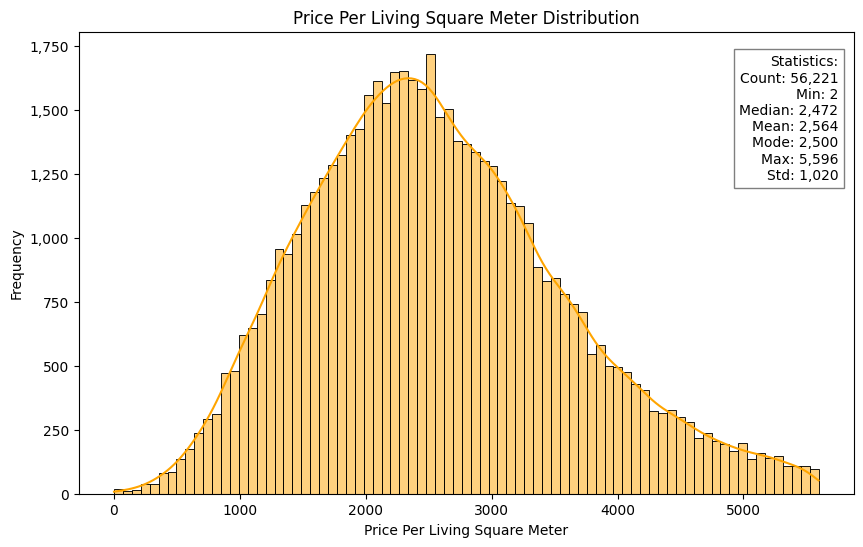

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for 'PricePerLivingSquareMeter' column
price_per_sq_meter_min = model_data['PricePerLivingSquareMeter'].min()
price_per_sq_meter_median = model_data['PricePerLivingSquareMeter'].median()
price_per_sq_meter_mean = model_data['PricePerLivingSquareMeter'].mean()
price_per_sq_meter_mode = model_data['PricePerLivingSquareMeter'].mode()[0]
price_per_sq_meter_max = model_data['PricePerLivingSquareMeter'].max()
price_per_sq_meter_std = model_data['PricePerLivingSquareMeter'].std()
price_per_sq_meter_count = model_data['PricePerLivingSquareMeter'].count()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histogram for 'PricePerLivingSquareMeter' column
plt.figure(figsize=(10, 6))
sns.histplot(data=model_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text box for 'PricePerLivingSquareMeter' column statistics in the upper right corner
plt.text(0.98, 0.95, f'Statistics:\nCount: {format_number(price_per_sq_meter_count)}\nMin: {format_number(price_per_sq_meter_min)}\nMedian: {format_number(price_per_sq_meter_median)}\nMean: {format_number(price_per_sq_meter_mean)}\nMode: {format_number(price_per_sq_meter_mode)}\nMax: {format_number(price_per_sq_meter_max)}\nStd: {format_number(price_per_sq_meter_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Per Living Square Meter Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()


That's much more normal. But maybe there's something hidden below the surface, doesn't it still look a little right shifted and broad at the top? Can you figure out why?

C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\1431515139.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\1431515139.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])


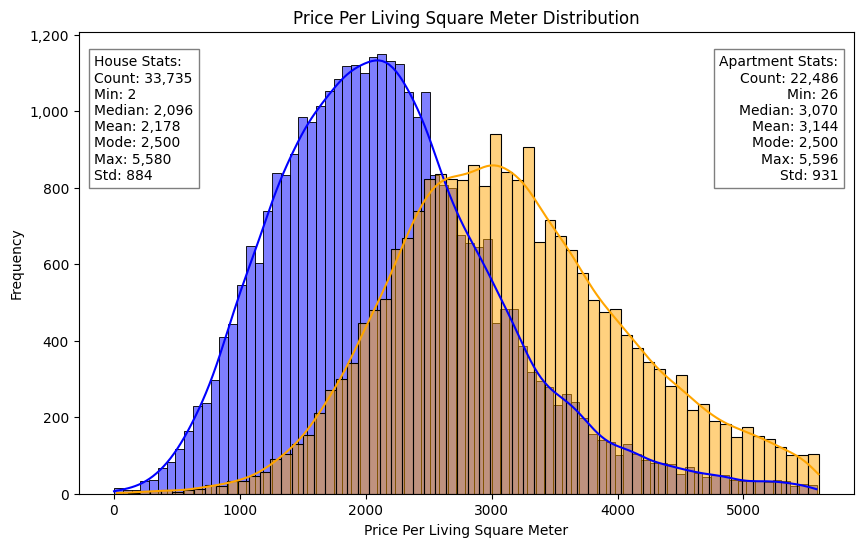

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Calculate statistics for house data
house_min = model_house_data['PricePerLivingSquareMeter'].min()
house_median = model_house_data['PricePerLivingSquareMeter'].median()
house_mean = model_house_data['PricePerLivingSquareMeter'].mean()
house_mode = model_house_data['PricePerLivingSquareMeter'].mode()[0]
house_max = model_house_data['PricePerLivingSquareMeter'].max()
house_std = model_house_data['PricePerLivingSquareMeter'].std()
house_count = model_house_data['PricePerLivingSquareMeter'].count()

# Calculate statistics for apartment data
apartment_min = model_apartment_data['PricePerLivingSquareMeter'].min()
apartment_median = model_apartment_data['PricePerLivingSquareMeter'].median()
apartment_mean = model_apartment_data['PricePerLivingSquareMeter'].mean()
apartment_mode = model_apartment_data['PricePerLivingSquareMeter'].mode()[0]
apartment_max = model_apartment_data['PricePerLivingSquareMeter'].max()
apartment_std = model_apartment_data['PricePerLivingSquareMeter'].std()
apartment_count = model_apartment_data['PricePerLivingSquareMeter'].count()

# Format statistics with comma separators and rounding to the nearest whole number
def format_number(num):
    return f'{num:,.0f}'

# Plot histograms for house and apartment data
plt.figure(figsize=(10, 6))
sns.histplot(data=model_house_data['PricePerLivingSquareMeter'], kde=True, color='blue', palette=['blue'])
sns.histplot(data=model_apartment_data['PricePerLivingSquareMeter'], kde=True, color='orange', palette=['orange'])

# Add text boxes for house and apartment statistics
plt.text(0.02, 0.95, f'House Stats:\nCount: {format_number(house_count)}\nMin: {format_number(house_min)}\nMedian: {format_number(house_median)}\nMean: {format_number(house_mean)}\nMode: {format_number(house_mode)}\nMax: {format_number(house_max)}\nStd: {format_number(house_std)}',
         horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.98, 0.95, f'Apartment Stats:\nCount: {format_number(apartment_count)}\nMin: {format_number(apartment_min)}\nMedian: {format_number(apartment_median)}\nMean: {format_number(apartment_mean)}\nMode: {format_number(apartment_mode)}\nMax: {format_number(apartment_max)}\nStd: {format_number(apartment_std)}',
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

# Set title and labels
plt.title('Price Per Living Square Meter Distribution')
plt.xlabel('Price Per Living Square Meter')
plt.ylabel('Frequency')

# Add comma separators for y-axis tick labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format_number(x)))

# Show the plot
plt.show()


By splitting the price data into Home and Apartment we can see two separate normal distribution curves appear. They're still a bit right shifted, so let's explore more sub categories. Check what attributes are related to each other with a correlation matrix. 

## Comparing Model data correlation matrix to Cleaned data matrix, grouping houses and appartments

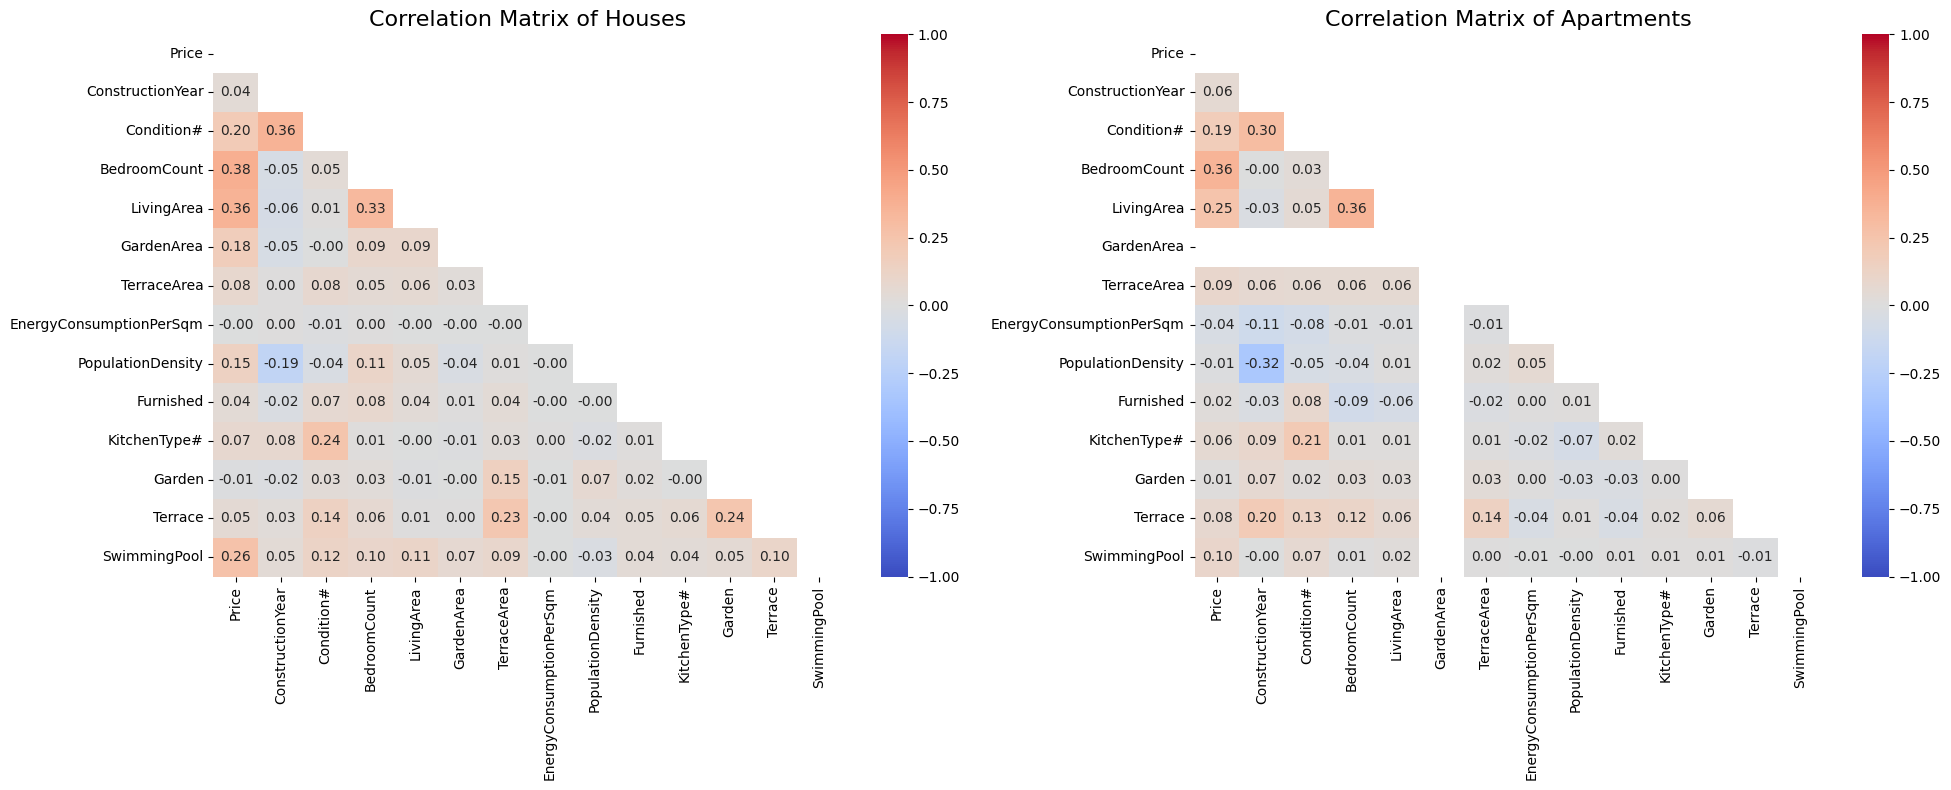

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'ConstructionYear', 'Condition#', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'PopulationDensity', 'Furnished', 'KitchenType#', 'Garden', 'Terrace', 'SwimmingPool']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = cleaned_data[cleaned_data['PropertyType'] == 'House'][columns_to_include]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = cleaned_data[cleaned_data['PropertyType'] == 'Apartment'][columns_to_include]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90)
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

The correlations aren't very strong, but perhaps that has something to do with the extreme outliers. Check again with the model_data dataframe.

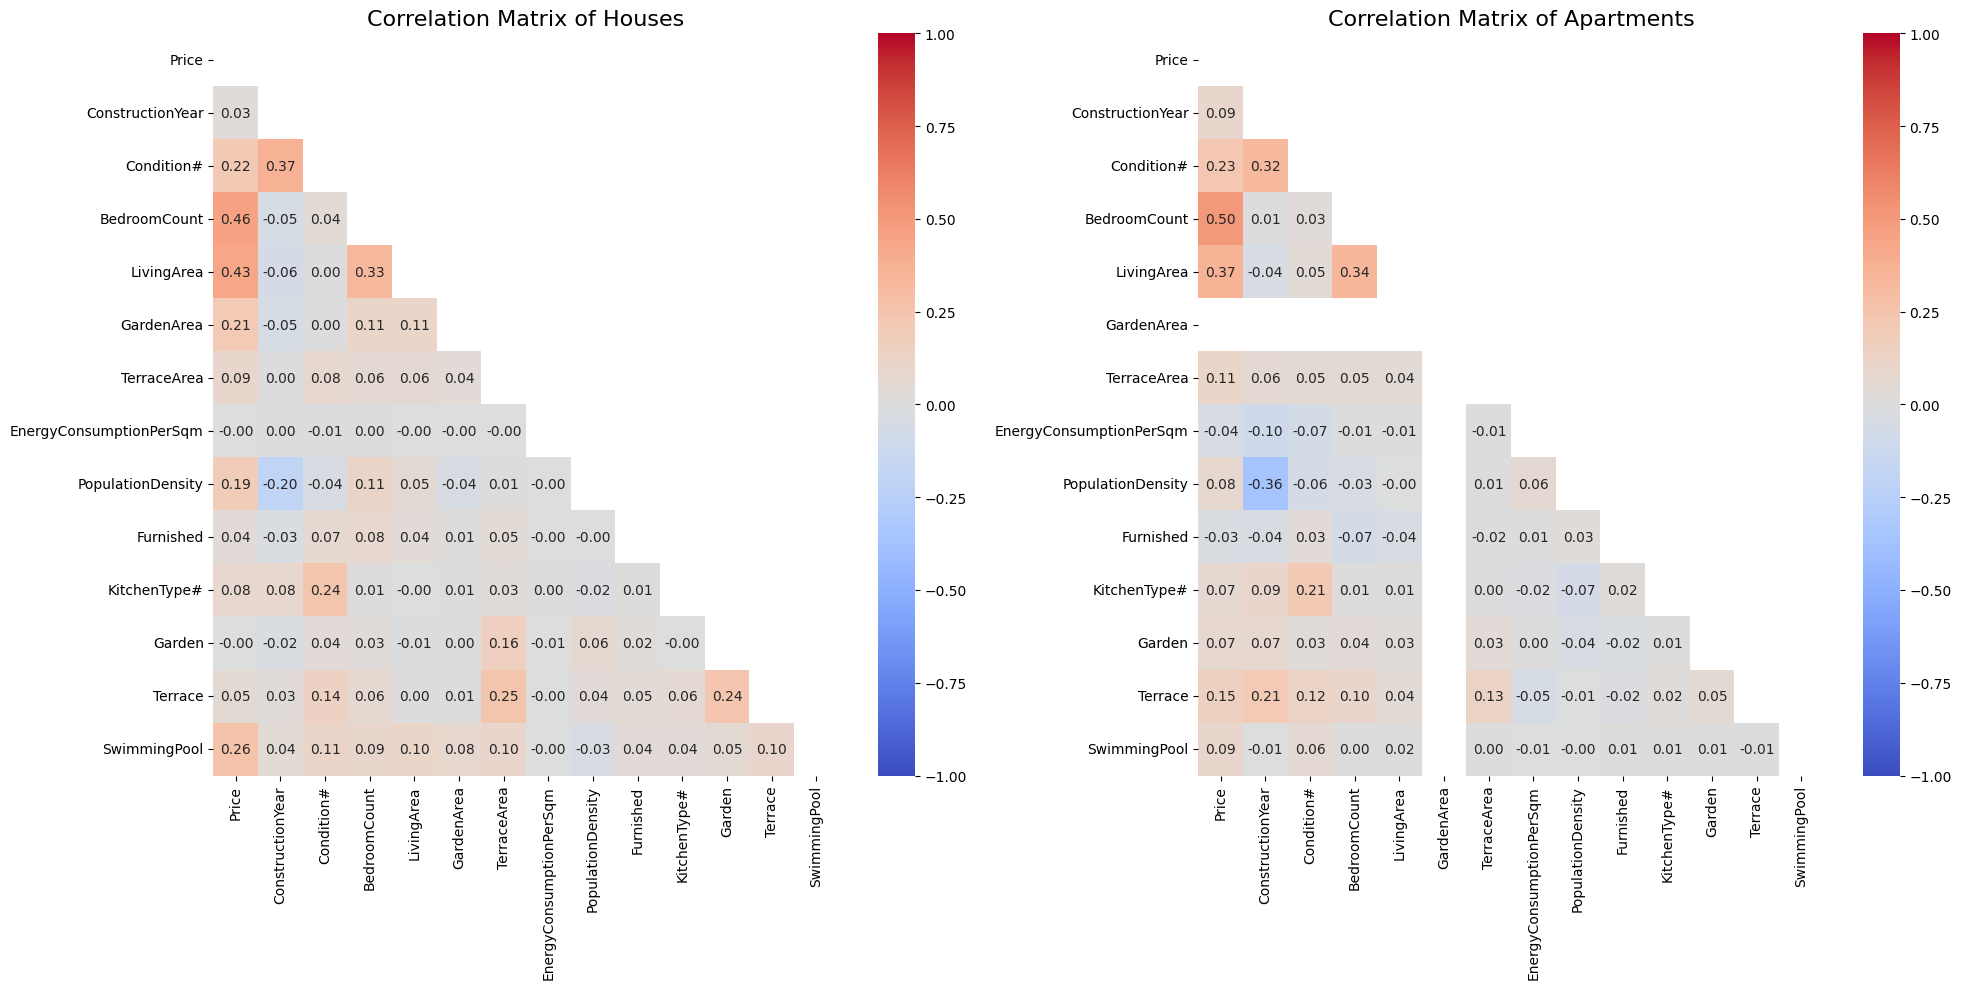

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'ConstructionYear', 'Condition#', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'PopulationDensity', 'Furnished', 'KitchenType#', 'Garden', 'Terrace', 'SwimmingPool']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = model_data[model_data['PropertyType'] == 'House'][columns_to_include]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = model_data[model_data['PropertyType'] == 'Apartment'][columns_to_include]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

## Looking at location

## Looking at property type

Now we see the attributes most correlated with price: LivingArea, BedroomCount, Condition#, and EnergyConsumption. There's a mild positive relationship to population density and we hypothesize there could be a stronger coorelation if we were able to join the populationdensity data to the more specific long/lat coordinates rather than the postal code. Uniquely, houses have a positive relationship to pools and apartments to terraces. Let's keep checking the other categorical values against price.

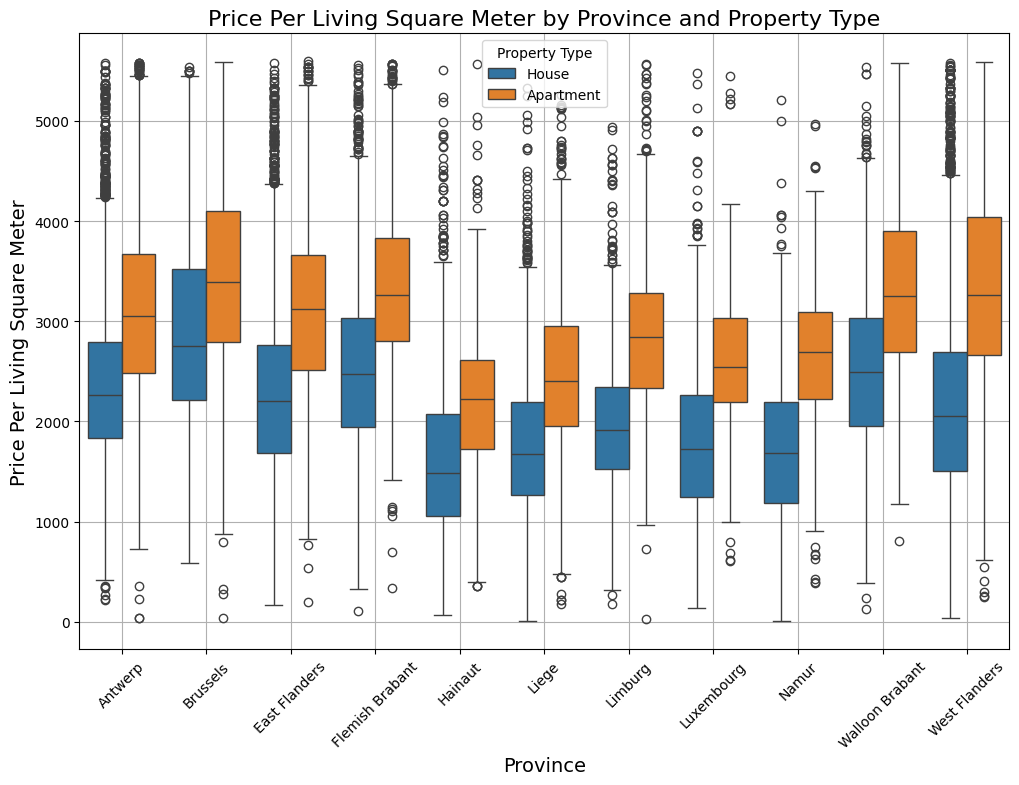

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique provinces and sort alphabetically
provinces = sorted(model_data['Province'].unique())

# Create a box plot with provinces sorted alphabetically
plt.figure(figsize=(12, 8))
sns.boxplot(x='Province', y='PricePerLivingSquareMeter', hue='PropertyType', data=model_data, order=provinces)
plt.title('Price Per Living Square Meter by Province and Property Type', fontsize=16)
plt.xlabel('Province', fontsize=14)
plt.ylabel('Price Per Living Square Meter', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Property Type')
plt.grid(True)
plt.show()

Clearly location has an effect on the price per square meter as well. Brussels is the relatively highest priced location, though the beach apartments of West Flanders appear to be quite high as well. How does propety sub-type affect price?

C:\Users\Viktor C\AppData\Local\Temp\ipykernel_4208\524638552.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', palette='rainbow')


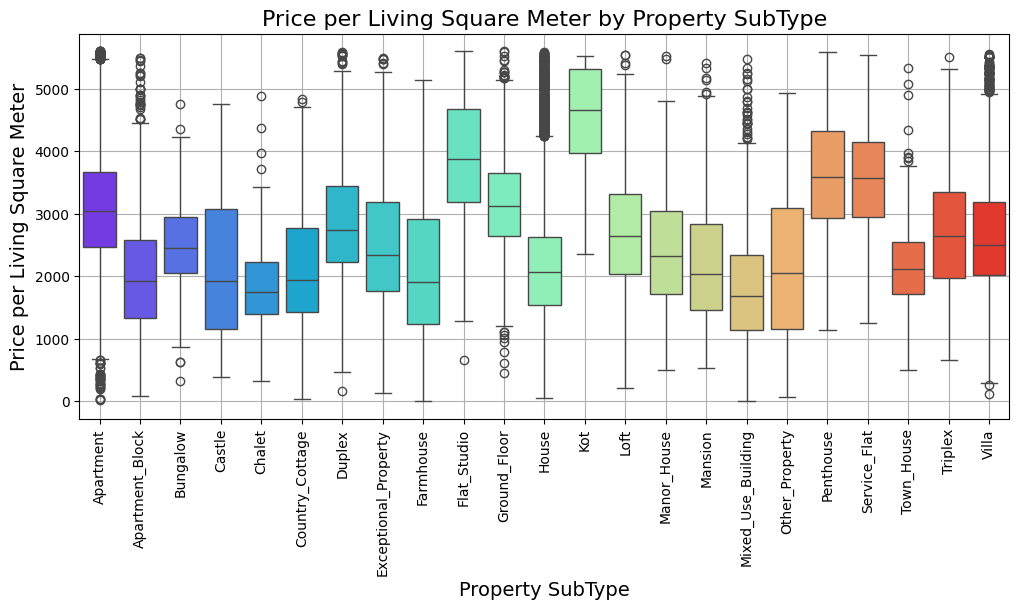

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Create a box plot with hue based on Furnished column
plt.figure(figsize=(12, 5))
sns.boxplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter', palette='rainbow')
plt.title('Price per Living Square Meter by Property SubType', fontsize=16)
plt.xlabel('Property SubType', fontsize=14)
plt.ylabel('Price per Living Square Meter', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(True)
plt.show()

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\3752942840.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter',


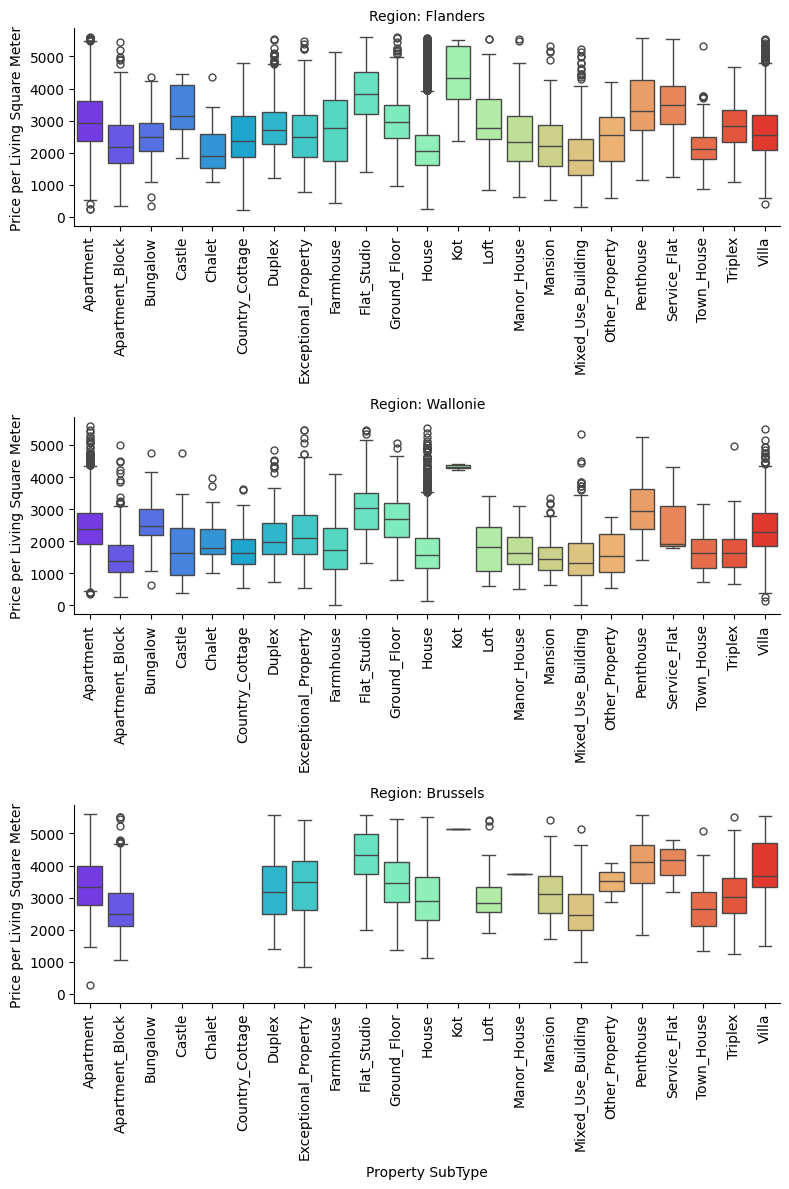

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Get the sorted order of PropertySubType
sorted_subtype_order = model_data_sorted['PropertySubType'].unique()

# Create a box plot with hue based on Furnished column
g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter',
                col='Region', col_wrap=1, kind='box', height=4, aspect=2,
                legend_out=False, sharex=False, order=sorted_subtype_order, palette='rainbow')

g.set_titles("Region: {col_name}")
g.set_axis_labels('Property SubType', 'Price per Living Square Meter')
g.set_xticklabels(rotation=90)  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()

C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\1577562860.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter',


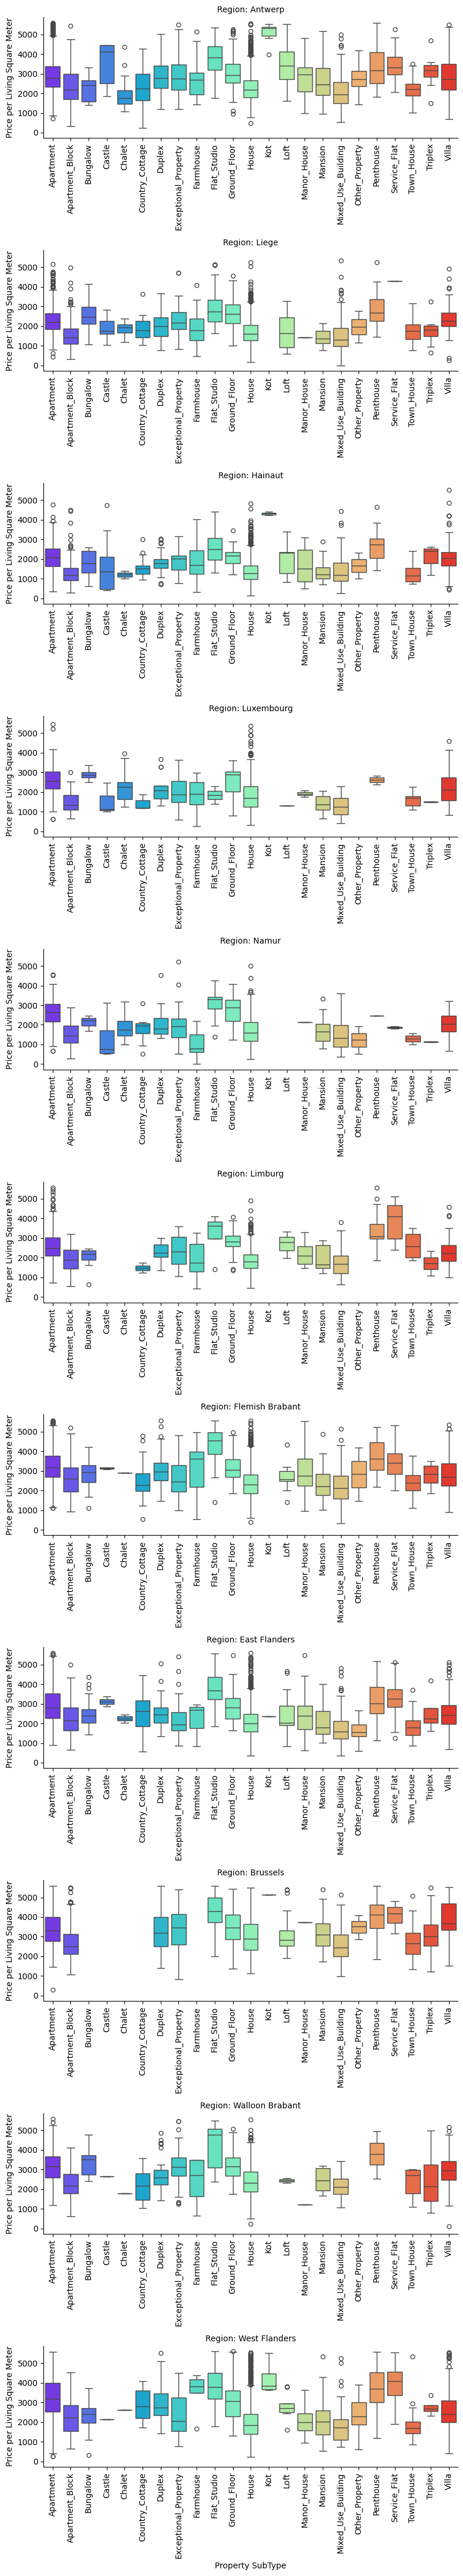

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort PropertySubType alphabetically
model_data_sorted = model_data.sort_values(by='PropertySubType')

# Get the sorted order of PropertySubType
sorted_subtype_order = model_data_sorted['PropertySubType'].unique()

# Create a box plot with hue based on Furnished column
g = sns.catplot(data=model_data_sorted, x='PropertySubType', y='PricePerLivingSquareMeter',
                col='Province', col_wrap=1, kind='box', height=4, aspect=2,
                legend_out=False, sharex=False, order=sorted_subtype_order, palette='rainbow')

g.set_titles("Region: {col_name}")
g.set_axis_labels('Property SubType', 'Price per Living Square Meter')
g.set_xticklabels(rotation=90)  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()

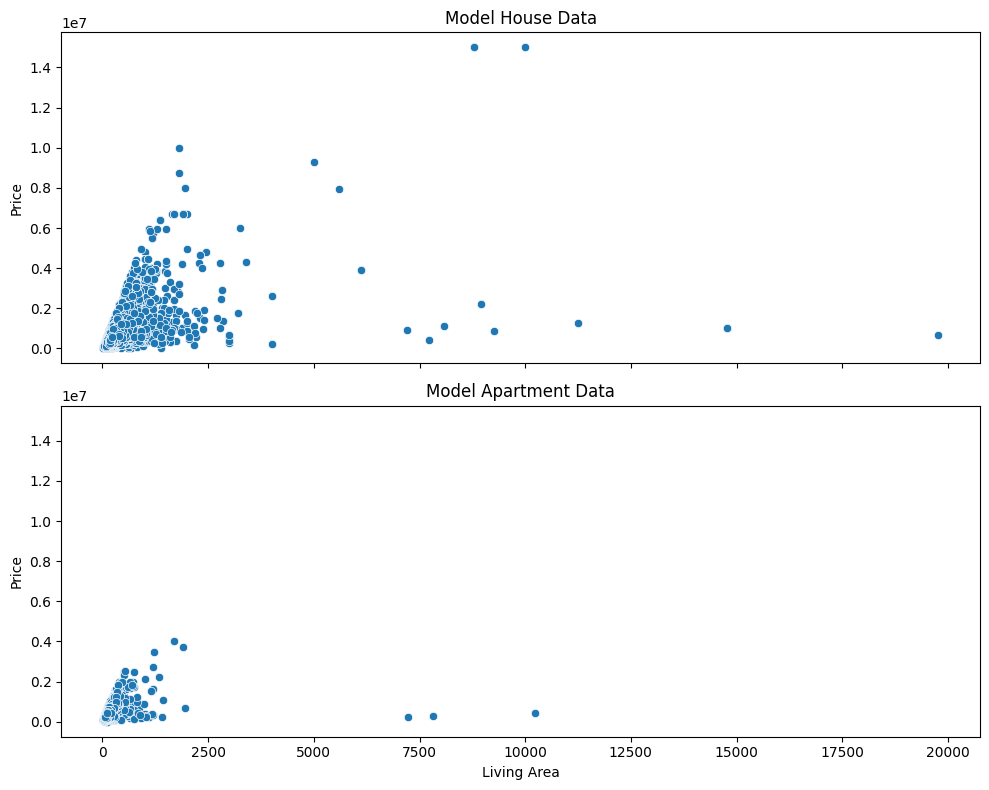

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data
sns.scatterplot(data=model_house_data, x='LivingArea', y='Price', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=model_apartment_data, x='LivingArea', y='Price', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

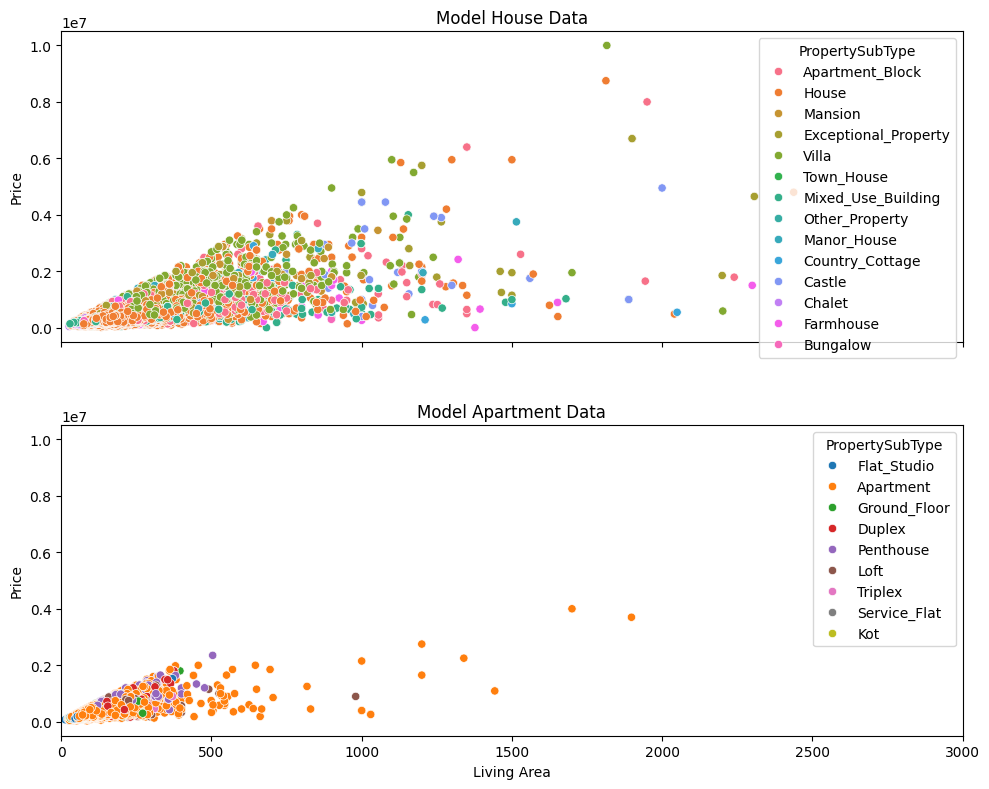

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data with color hue based on PropertySubType
sns.scatterplot(data=model_house_data[model_house_data['LivingArea'] < 3000], 
                x='LivingArea', y='Price', hue='PropertySubType', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('Living Area')
axes[0].set_ylabel('Price')
axes[0].set_xlim(0, 3000)  # Limit x-axis to 0-3000

# Plot scatterplot for model_apartment_data with color hue based on PropertySubType
sns.scatterplot(data=model_apartment_data[model_apartment_data['LivingArea'] < 3000], 
                x='LivingArea', y='Price', hue='PropertySubType', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('Living Area')
axes[1].set_ylabel('Price')
axes[1].set_xlim(0, 3000)  # Limit x-axis to 0-3000

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

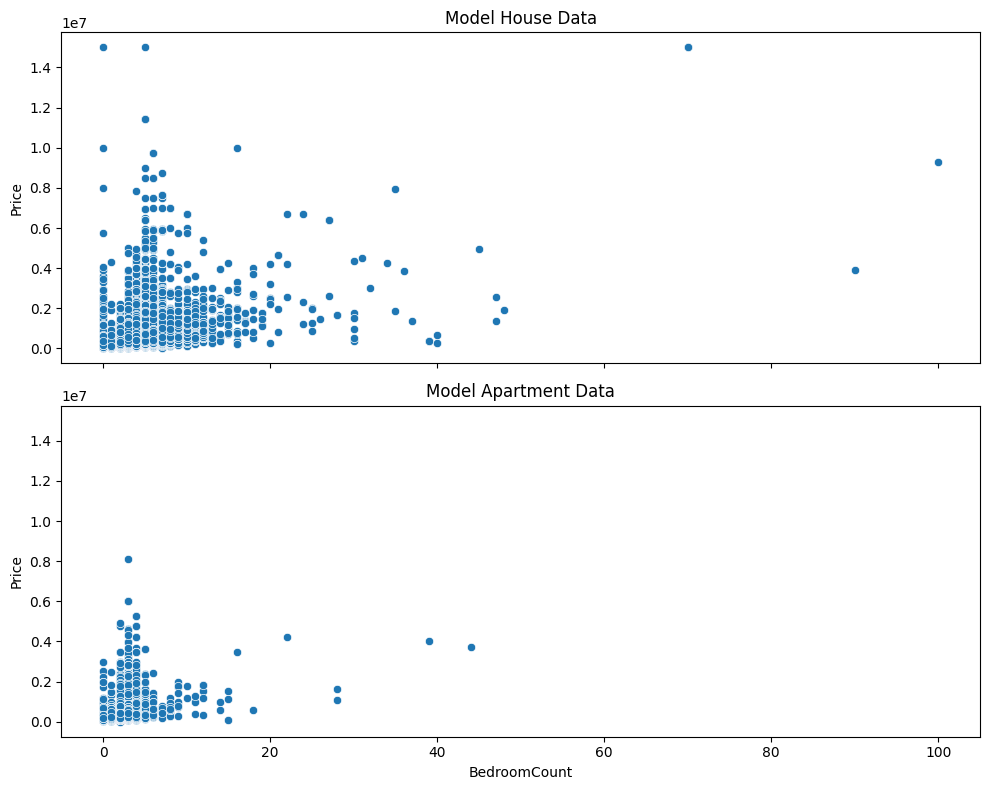

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot scatterplot for model_house_data
sns.scatterplot(data=clean_house_data, x='BedroomCount', y='Price', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Model House Data')
axes[0].set_xlabel('BedroomCount')
axes[0].set_ylabel('Price')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=clean_apartment_data, x='BedroomCount', y='Price', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('Model Apartment Data')
axes[1].set_xlabel('BedroomCount')
axes[1].set_ylabel('Price')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Looking at Energy consumption and condition

<Axes: xlabel='EnergyConsumptionPerSqm', ylabel='PricePerLivingSquareMeter'>

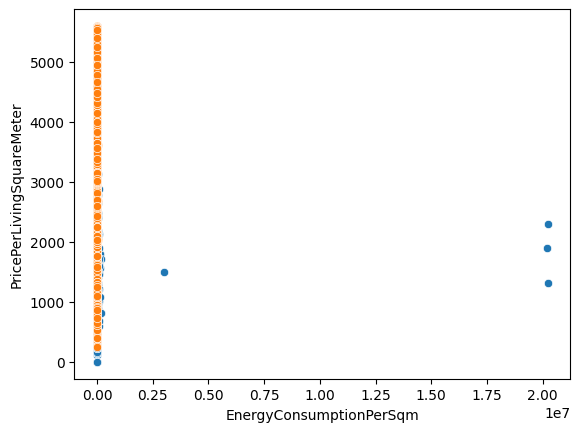

In [24]:
sns.scatterplot(data=model_house_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')
sns.scatterplot(data=model_apartment_data, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')

Okay, there appear to be a few extreme outliers in energy consumpition, let's look at those and decide if we should remove them.

In [25]:
cleaned_data.sort_values(by='EnergyConsumptionPerSqm', ascending=False).head(20)


ID                 City  PostalCode    Region           District  \
22813  11143405                 Gent        9000  Flanders               Gent   
13129  10979536            Rotselaar        3110  Flanders             Leuven   
24189  11000734           Sint-Kruis        8310  Flanders             Brugge   
31500  10849617                  Mol        2400  Flanders           Turnhout   
5814   11116369                Liege        4020  Wallonie              Liege   
18449  11174968               Renaix        9600  Flanders         Oudenaarde   
4569   10855066              Halleux        6986  Wallonie  Marche-En-Famenne   
9639   11079229              Tournai        7500  Wallonie            Tournai   
4171   10989702             Gembloux        5030  Wallonie              Namur   
4629   11177557  La Roche-En-Ardenne        6980  Wallonie  Marche-En-Famenne   
2286   11132308             Helecine        1357  Wallonie           Nivelles   
4672   11024828                Gouvy        6670  Wallonie           Bastogne   
1885   11100162  Jodoigne-Souveraine        1370  Wallonie           Nivelles   
7107   11049026              Seraing        4100  Wallonie              Liege   
9625   11104871             Lessines        7860  Wallonie           Soignies   
9393   11104850             Lessines        7864  Wallonie           Soignies   
11763  11120499                  Ath        7800  Wallonie                Ath   
1953   11132436               Genval        1332  Wallonie           Nivelles   
4041   11020237             Gembloux        5030  Wallonie              Namur   
11310  11169315      Braine-Le-Comte        7090  Wallonie           Soignies   

              Province PropertyType PropertySubType     Price  \
22813    East Flanders        House           House  249000.0   
13129  Flemish Brabant        House           House  395000.0   
24189    West Flanders        House           Villa  399000.0   
31500          Antwerp        House           House  339000.0   
5814             Liege        House      Town_House  395000.0   
18449    East Flanders        House           House  185000.0   
4569        Luxembourg        House           House  495000.0   
9639           Hainaut        House           House  325000.0   
4171             Namur        House           House  349000.0   
4629        Luxembourg        House           House  445000.0   
2286   Walloon Brabant        House       Farmhouse  295000.0   
4672        Luxembourg        House           House  698000.0   
1885   Walloon Brabant        House           House  449000.0   
7107             Liege        House      Town_House  260000.0   
9625           Hainaut        House       Farmhouse  440000.0   
9393           Hainaut        House       Farmhouse  440000.0   
11763          Hainaut        House           Villa  366000.0   
1953   Walloon Brabant        House           House  375000.0   
4041             Namur        House           House  219000.0   
11310          Hainaut        House           House  245000.0   

       ConstructionYear  ...  ListingExpirationDate  ListingCloseDate  \
22813               NaN  ...             2024-06-14               NaN   
13129            1982.0  ...             2024-02-29               NaN   
24189               NaN  ...             2024-02-29               NaN   
31500            1934.0  ...             2024-06-01               NaN   
5814                NaN  ...             2024-06-14               NaN   
18449               NaN  ...             2024-06-29               NaN   
4569                NaN  ...             2024-02-15               NaN   
9639                NaN  ...             2024-05-31               NaN   
4171                NaN  ...             2024-02-29               NaN   
4629             1973.0  ...             2024-07-14               NaN   
2286                NaN  ...             2024-06-14               NaN   
4672             1971.0  ...             2024-04-30               NaN

What does it look like with outliers removed?

<Axes: xlabel='EnergyConsumptionPerSqm', ylabel='PricePerLivingSquareMeter'>

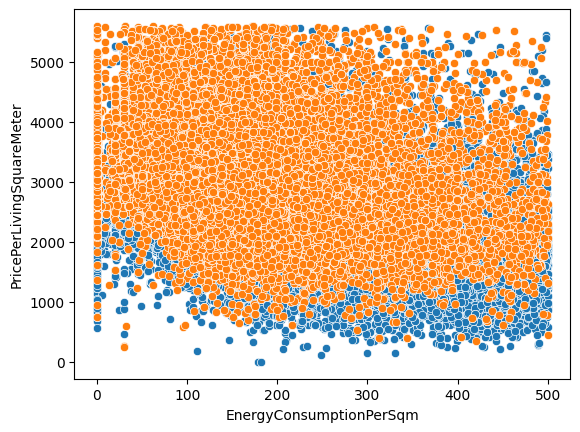

In [39]:
# Filter outliers from model_house_data
model_house_data_filtered = model_house_data.query('EnergyConsumptionPerSqm <= 500')

# Plot scatterplot for model_house_data
sns.scatterplot(data=model_house_data_filtered, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')

# Filter outliers from model_apartment_data
model_apartment_data_filtered = model_apartment_data.query('EnergyConsumptionPerSqm <= 500')

# Plot scatterplot for model_apartment_data
sns.scatterplot(data=model_apartment_data_filtered, x='EnergyConsumptionPerSqm', y='PricePerLivingSquareMeter')

Better, but hard to see a correlation.. maybe it's slightly negative? Rerun the correlation matrix to check.

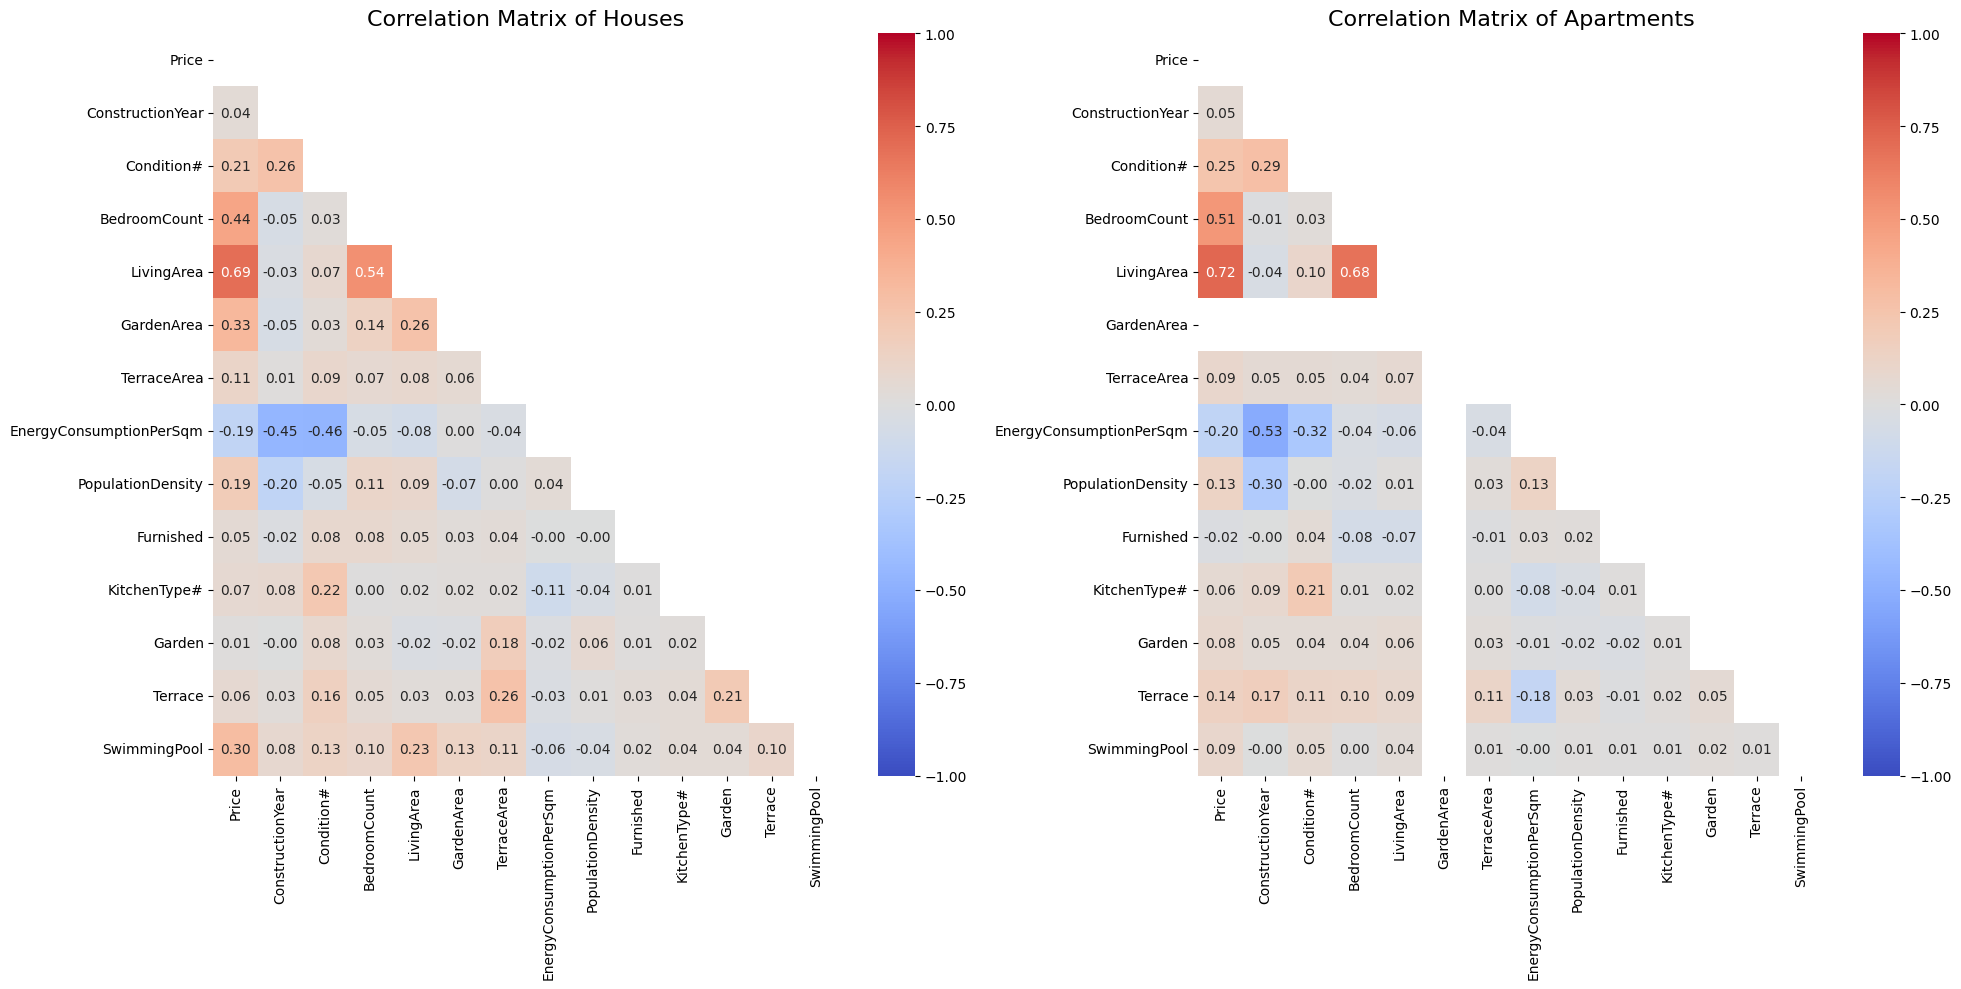

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Specify the columns you want to include in the correlation matrix
columns_to_include = ['Price', 'ConstructionYear', 'Condition#', 'BedroomCount', 'LivingArea', 'GardenArea', 'TerraceArea', 'EnergyConsumptionPerSqm', 'PopulationDensity', 'Furnished', 'KitchenType#', 'Garden', 'Terrace', 'SwimmingPool']

# Filter the dataframe to include only the specified columns and PropertyType == House
numeric_columns_house = model_data[model_data['PropertyType'] == 'House'][columns_to_include]

# Filter outliers from EnergyConsumptionPerSqm column for houses
numeric_columns_house = numeric_columns_house[numeric_columns_house['EnergyConsumptionPerSqm'] <= 500]

# Filter the dataframe to include only the specified columns and PropertyType == Apartment
numeric_columns_apartment = model_data[model_data['PropertyType'] == 'Apartment'][columns_to_include]

# Filter outliers from EnergyConsumptionPerSqm column for apartments
numeric_columns_apartment = numeric_columns_apartment[numeric_columns_apartment['EnergyConsumptionPerSqm'] <= 500]

# Compute the correlation matrix for House
correlation_matrix_house = numeric_columns_house.corr()

# Compute the correlation matrix for Apartment
correlation_matrix_apartment = numeric_columns_apartment.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_house, dtype=bool))

# Create subplots for House and Apartment
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot correlation matrix for House
sns.heatmap(correlation_matrix_house, mask=mask, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[0].set_title('Correlation Matrix of Houses', fontsize=16)
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[0].tick_params(axis='y', rotation=0)

# Plot correlation matrix for Apartment
sns.heatmap(correlation_matrix_apartment, mask=mask, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10}, vmin=-1, vmax=1)
axes[1].set_title('Correlation Matrix of Apartments', fontsize=16)
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

that's interesting, there now appears to be a negative correlation between price and energyconsumption. Good find! Let's keep exploring EnergyConsumptionPerSqm, and consider updating your model data to remove the outliers.

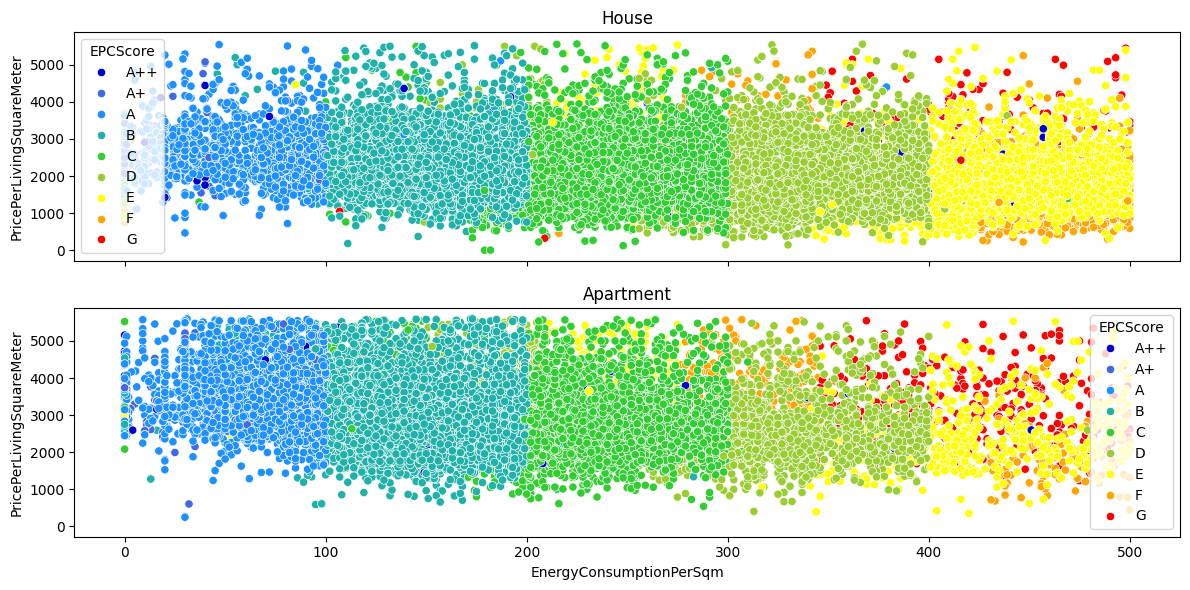

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'G': 'red',     # G: red
    'F': 'orange',  # F: orange
    'E': 'yellow',  # E: yellow
    'D': 'yellowgreen',  # D: yellow-green
    'C': 'limegreen',    # C: green
    'B': 'lightseagreen',  # B: light blue-green
    'A': 'dodgerblue',  # A: blue
    'A+': 'royalblue',  # A+: dark blue
    'A++': 'mediumblue', # A++: medium blue
}

# Define custom order for EPCScore legend
epc_score_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

# Scatter plot for PropertyType == House
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_house_data_filtered, ax=axs[0])
axs[0].set_title('House')

# Scatter plot for PropertyType == Apartment
sns.scatterplot(x="EnergyConsumptionPerSqm", y="PricePerLivingSquareMeter", hue='EPCScore', hue_order=epc_score_order, palette=custom_palette, data=model_apartment_data_filtered, ax=axs[1])
axs[1].set_title('Apartment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\3636228497.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="EPCScore", y="PricePerLivingSquareMeter", order=epc_score_order, palette=custom_palette, data=model_house_data, ax=axs[0])
C:\Users\bearr\AppData\Local\Temp\ipykernel_11224\3636228497.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="EPCScore", y="PricePerLivingSquareMeter", order=epc_score_order, palette=custom_palette, data=model_apartment_data, ax=axs[1])


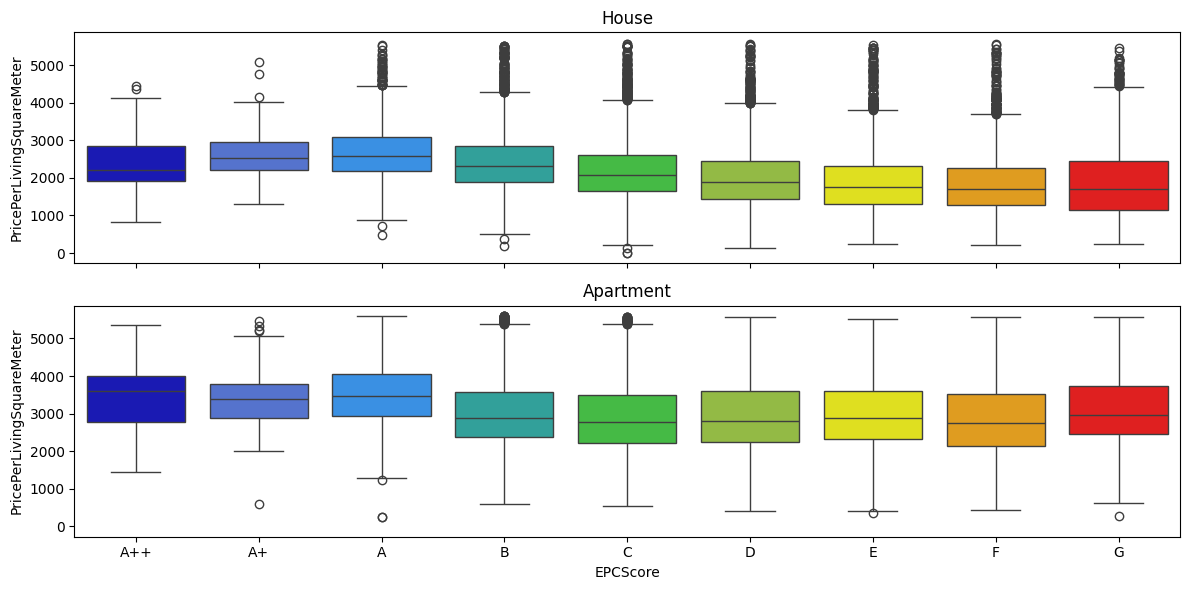

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom color palette
custom_palette = {
    'G': 'red',     # G: red
    'F': 'orange',  # F: orange
    'E': 'yellow',  # E: yellow
    'D': 'yellowgreen',  # D: yellow-green
    'C': 'limegreen',    # C: green
    'B': 'lightseagreen',  # B: light blue-green
    'A': 'dodgerblue',  # A: blue
    'A+': 'royalblue',  # A+: dark blue
    'A++': 'mediumblue', # A++: medium blue
}

# Define custom order for EPCScore legend
epc_score_order = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a figure with two subplots side by side
fig, axs = plt.subplots(2, 1, figsize=(12, 6), sharex=True, sharey=True)

# Box plot for PropertyType == House
sns.boxplot(x="EPCScore", y="PricePerLivingSquareMeter", order=epc_score_order, palette=custom_palette, data=model_house_data, ax=axs[0])
axs[0].set_title('House')

# Box plot for PropertyType == Apartment
sns.boxplot(x="EPCScore", y="PricePerLivingSquareMeter", order=epc_score_order, palette=custom_palette, data=model_apartment_data, ax=axs[1])
axs[1].set_title('Apartment')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
# Dictionary for translating energy consumption to EPCScore
epc_score_mapping = {
    'A+': lambda x: '<0' if x < 0 else None,
    'A': lambda x: '100 to 0' if 0 <= x < 100 else None,
    'B': lambda x: '200 to 100' if 100 <= x < 200 else None,
    'C': lambda x: '300 to 200' if 200 <= x < 300 else None,
    'D': lambda x: '400 to 300' if 300 <= x < 400 else None,
    'E': lambda x: '500 to 400' if 400 <= x < 500 else None,
    'F': lambda x: '>500' if x >= 500 else None
}

# Function to apply the translation
def translate_energy_consumption(energy_consumption):
    for key, value in epc_score_mapping.items():
        result = value(energy_consumption)
        if result is not None:
            return result

# Apply translation to create the new column
model_data['AdjEPCScore'] = model_data['EnergyConsumptionPerSqm'].apply(translate_energy_consumption)

print(model_data)


             ID                  City  PostalCode    Region  District  \
0      11144966          Saint-Gilles        1060  Brussels  Brussels   
1      10804330            Schaerbeek        1030  Brussels  Brussels   
2      10848449  Woluwe-Saint-Lambert        1200  Brussels  Brussels   
3      10804329            Schaerbeek        1030  Brussels  Brussels   
4      10454309             Bruxelles        1080  Brussels  Brussels   
...         ...                   ...         ...       ...       ...   
40386  11070262              Mechelen        2800  Flanders  Mechelen   
40387  11079075             Antwerpen        2600  Flanders   Antwerp   
40388  10917926                 Rumst        2840  Flanders   Antwerp   
40389  11056745             Antwerpen        2060  Flanders   Antwerp   
40390  11147283             Antwerpen        2600  Flanders   Antwerp   

       Province PropertyType  PropertySubType      Price  ConstructionYear  \
0      Brussels        House  Apartment_Block

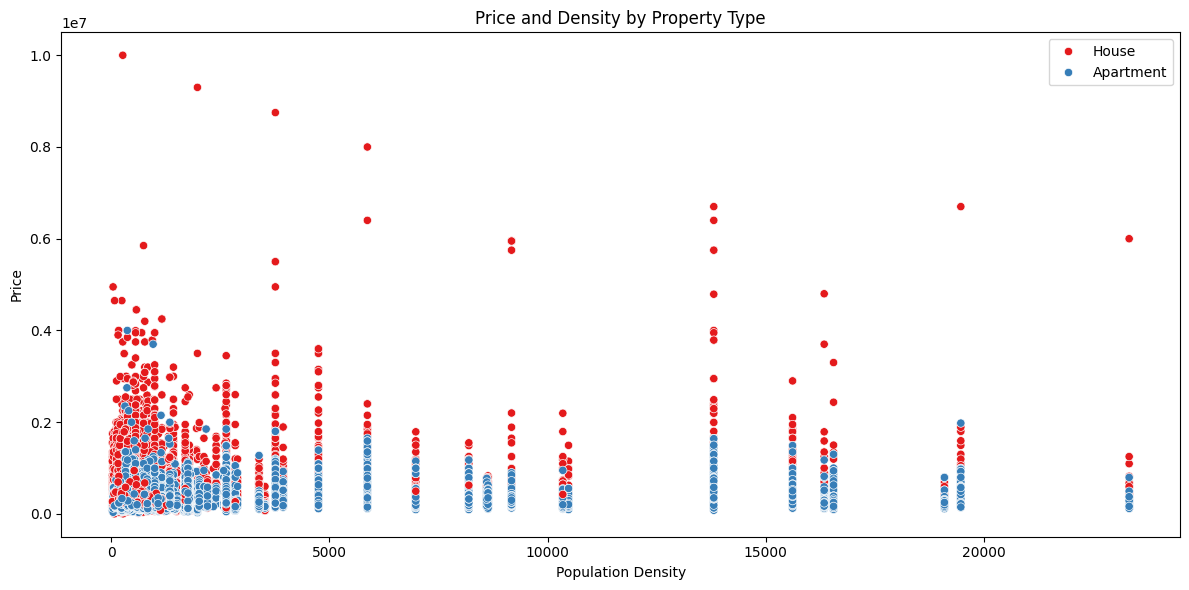

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=model_data, x='PopulationDensity', y='Price', hue='PropertyType', palette='Set1')

# Set title and labels
plt.title('Price and Density by Property Type')
plt.xlabel('Population Density')
plt.ylabel('Price')

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

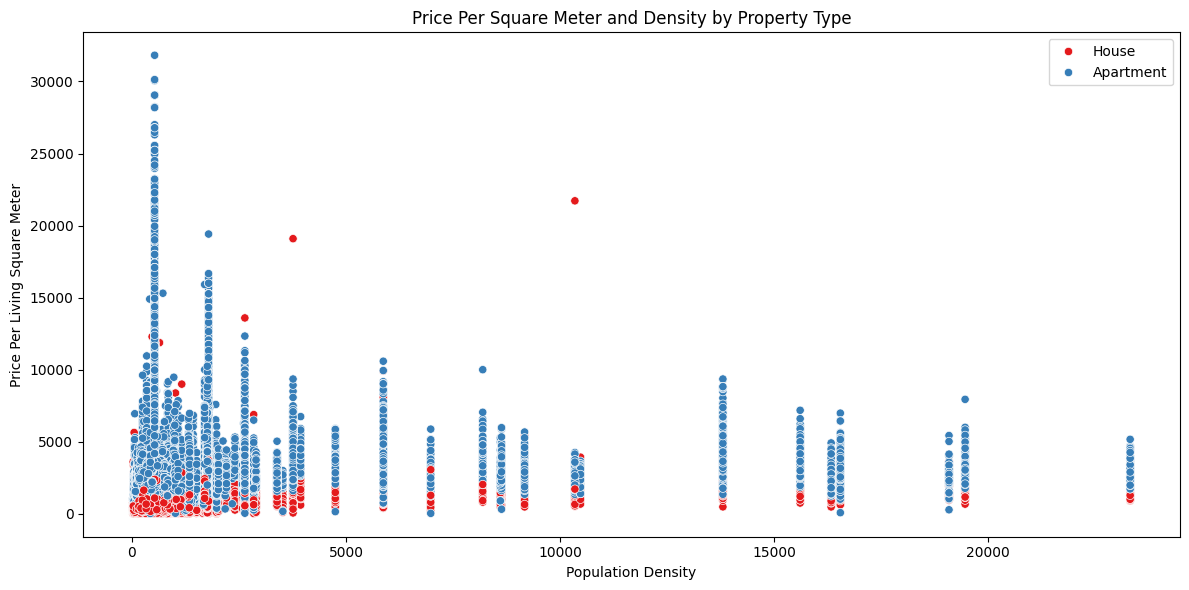

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='PopulationDensity', y='PricePerTotalSquareMeter', hue='PropertyType', palette='Set1')

# Set title and labels
plt.title('Price Per Square Meter and Density by Property Type')
plt.xlabel('Population Density')
plt.ylabel('Price Per Living Square Meter')

# Show the plot
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Introducing population density

We assume populations density to have a certain influence on the price of a property, as properties seem to be more expensive in city centers as compared to more suburban areas. We thus expect a positive correlation between population density and price per square meter of a property.

In [42]:
import plotly.express as px

# Histogram for the 'Price' column
fig = px.histogram(model_data, x='PopulationDensity', nbins=100, title='Distribution of Population density')
fig.show()

It seems the population density data is really unevenly distributed, with some highly populated areas skewing the data

In [44]:
fig = px.scatter(model_data, x='PopulationDensity', y='PricePerLivingSquareMeter', title='Price per m² vs Population Density')
fig.show()

It seems that we are unable to draw conclusions about the population density variable in it's current form. This might be a very interesting variable to further explore. However, due to time limitations, we've decided on coming back to this variable at a later time.